In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import matplotlib as mpl
# mpl.rcParams['figure.figsize'] = (15,15)

mpl.rcParams['figure.figsize'] = (9,6)
plt.ioff()

color = [  'r', 'b','grey', 'black','teal','cornflowerblue', 'g', 'gray', 'c', 'r','m', 'y', 'k']
label_font_size = 18
marker = ['>', 'v', '^', 'o', 's']

d = 'out/'
def getXY(file_name, n = 3000):
    x, y = [], []
    with open(file_name) as f:
        for i, line in enumerate(f):
            entries = line.split()
            y.append(float(entries[0]))
            x.append(float(entries[1]))
            if i >= n:
                break
    return x, y

def plot_mul(files):
    '''
    对比不同模型的PR曲线
    传入列表，元素为文件完整名
    '''
    print(d)
    for i, f in enumerate(files):
        path = './{}/{}'.format(d,f)
        if not os.path.exists(path):
            print('{} is not exists'.format(f))
            continue

        x, y = getXY(path)
        plt.plot(x,y, marker = marker[i%len(marker)], markevery = 100, markersize = 5, color = color[i%len(color)])
    legend = ['_'.join(i.split('_')[:-2]) for i in files]
    plt.legend(legend, prop={'size':12})
    plt.ylim([0.3, 1])
    # plt.xlim([0.0, 0.5])
    plt.xlim([0.0, 0.3])
    plt.xlabel('Recall', fontsize=label_font_size)
    plt.ylabel('Precision', fontsize=label_font_size)
    plt.gca().tick_params(labelsize=16)
    plt.grid(linestyle='dashdot')
    plt.show()    
    

def plot_one(prefix, flag=True):
    '''
    绘制同一个模型不同epoch的PR曲线
    传入模型前缀即可(如: PCNN_ATT_DEF)
    '''
    fid = []
    print(d)
    for i in range(1, 25):
        if flag:
            path = './{}/{}_{}_PR.txt'.format(d, prefix, i)
        else:
            path = './{}/{}_{}.txt'.format(d, prefix, i)
        if not os.path.exists(path):
            #print path
            continue
        fid.append(i)
        x, y = getXY(path)
        plt.plot(x,y, marker = '>', markevery = 100, markersize = 5, color = color[(i-1)%len(color)])
        
    plt.legend([prefix + str(i) for i in fid],prop={'size':10})
    plt.ylim([0.2, 1])
    plt.xlim([0.0, 0.5])
    plt.xlabel('Recall', fontsize=label_font_size,)
    plt.ylabel('Precision', fontsize=label_font_size)
    plt.gca().tick_params(labelsize=16)
    plt.grid(linestyle='dashdot')
    plt.show()

out/


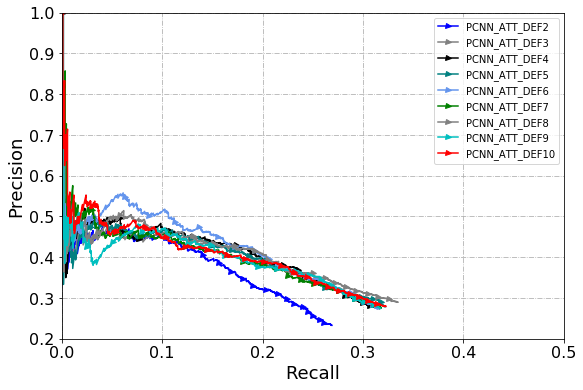

In [32]:
plot_one("PCNN_ATT_DEF")

out/


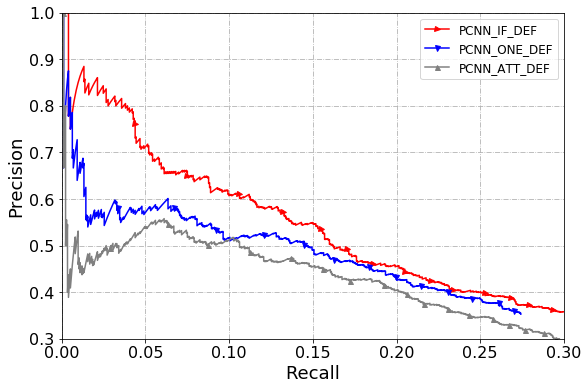

In [34]:
plot_mul(["PCNN_IF_DEF_8_PR.txt","PCNN_ONE_DEF_10_PR.txt","PCNN_ATT_DEF_6_PR.txt"])